In [1]:
#Imports
# also requires openpyxl : pip install pandas xlrd openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

We used two datasets:

- **LieWaves (EEG)**: EEG signals under truthful and deceptive conditions, preprocessed with Band Pass, ASR, ICA, and ATAR techniques.
- **Real-Life Deception Dataset (Gestures)**: Facial and bodily gesture annotations for truthful and deceptive subjects.

Preprocessing steps:
- **Import:** All CSV and Excel files were imported using `pandas`.
- **Parse:** The `class` column was converted from `"truthful"`/`"deceptive"` to numeric (1/0).
- **Organize:** Data was stored in structured dictionaries and DataFrames (`gestures_df`, `band_pass_df`, etc.) for easy manipulation.

In [3]:
# Getting Lie Waves Data

#Getting Band_Pass Preprocessed data
band_pass_df = {}
patient_number = 1
while patient_number < 28:
    band_pass_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S1.csv')
    band_pass_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/1_BandPass_Filtered/S{patient_number}S2.csv')
    patient_number += 1


## Getting ASR Preprocessed data
asr_df = {}
patient_number = 1
while patient_number < 28:
    asr_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S1.csv')
    asr_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/2_ASR/S{patient_number}S2.csv')
    patient_number += 1


# Getting ICA preprocessed Data
ica_df = {}
patient_number = 1
while patient_number < 28:
    ica_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S1.csv')
    ica_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/3_ICA/S{patient_number}S2.csv')
    patient_number += 1

    
atar_df = {}
patient_number = 1
while patient_number < 28:
    atar_df[f'patient_{patient_number}_exp_1'] = pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S1.csv')
    atar_df[f'patient_{patient_number}_exp_2'] = pd.read_csv(f'LieWaves/Preprocessing/4_ATAR/S{patient_number}S2.csv')
    patient_number += 1

# Getting subject stimulus data
subject_stimulus_df = pd.read_excel('LieWaves/Subject_Stimuli.xlsx')


In [4]:
# Getting Real-Life_Deception Data
gestures_df = pd.read_csv('Real-life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv')
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,deceptive
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,deceptive
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,deceptive
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,deceptive
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,deceptive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,truthful
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,truthful
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,truthful


In [5]:
# Changing the class to match other data set's classification
gestures_df.loc[gestures_df['class'] == 'deceptive', 'class'] = 0
gestures_df.loc[gestures_df['class'] == 'truthful', 'class'] = 1
gestures_df

,id,OtherGestures,Smile,Laugh,Scowl,otherEyebrowMovement,Frown,Raise,OtherEyeMovements,Close-R,...,forwardHead,downRHead,singleHand,bothHands,otherHandM,complexHandM,sidewaysHand,downHands,upHands,class
0,trial_lie_001.mp4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,trial_lie_002.mp4,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,trial_lie_003.mp4,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,trial_lie_004.mp4,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,trial_lie_005.mp4,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,trial_truth_056.mp4,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
117,trial_truth_057.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
118,trial_truth_058.mp4,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
119,trial_truth_059.mp4,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


## Two-Sample T-Test

We performed a two-sample T-test on the `"openMouth"` gesture to determine if there was a significant difference in its frequency between truthful and deceptive subjects. Same thing below but for `"lipsDown"`

- **H₀:** There is no difference in the average frequency of `"openMouth"` between the two classes.
- **H₁:** There is a difference in the average frequency of `"openMouth"` between the two classes.
- **Significance Level:** α = 0.05

### Conclusion:
The p-value was **above 0.05**, so we **fail to reject the null hypothesis**. There is no significant difference in `"openMouth"` frequency between truthful and deceptive speakers.
While for `"lipsDown"` the p-value was **below 0.05**, so we **reject the null hypothesis**. There is a significant difference in `"lipsDown"` frequency between truthful and deceptive speakers.

We also visualized average frequencies of all gestures with a grouped bar plot.

In [6]:
from scipy.stats import ttest_ind

# Choose gesture
gesture = "openMouth"

# Extract values for each class
truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

# Perform two-sample t-test
t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'openMouth'
T-statistic: 1.8807
P-value: 6.2548e-02
Result: Fail to reject the null hypothesis (no significant difference).


In [7]:
from scipy.stats import ttest_ind

gesture = "lipsDown"

truthful_vals = gestures_df[gestures_df["class"] == 1][gesture]
deceptive_vals = gestures_df[gestures_df["class"] == 0][gesture]

t_stat, p_val = ttest_ind(truthful_vals, deceptive_vals, equal_var=False)

print(f"Hypothesis Test for Gesture: '{gesture}'")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference).")


Hypothesis Test for Gesture: 'lipsDown'
T-statistic: 4.1709
P-value: 6.2217e-05
Result: Reject the null hypothesis (significant difference).


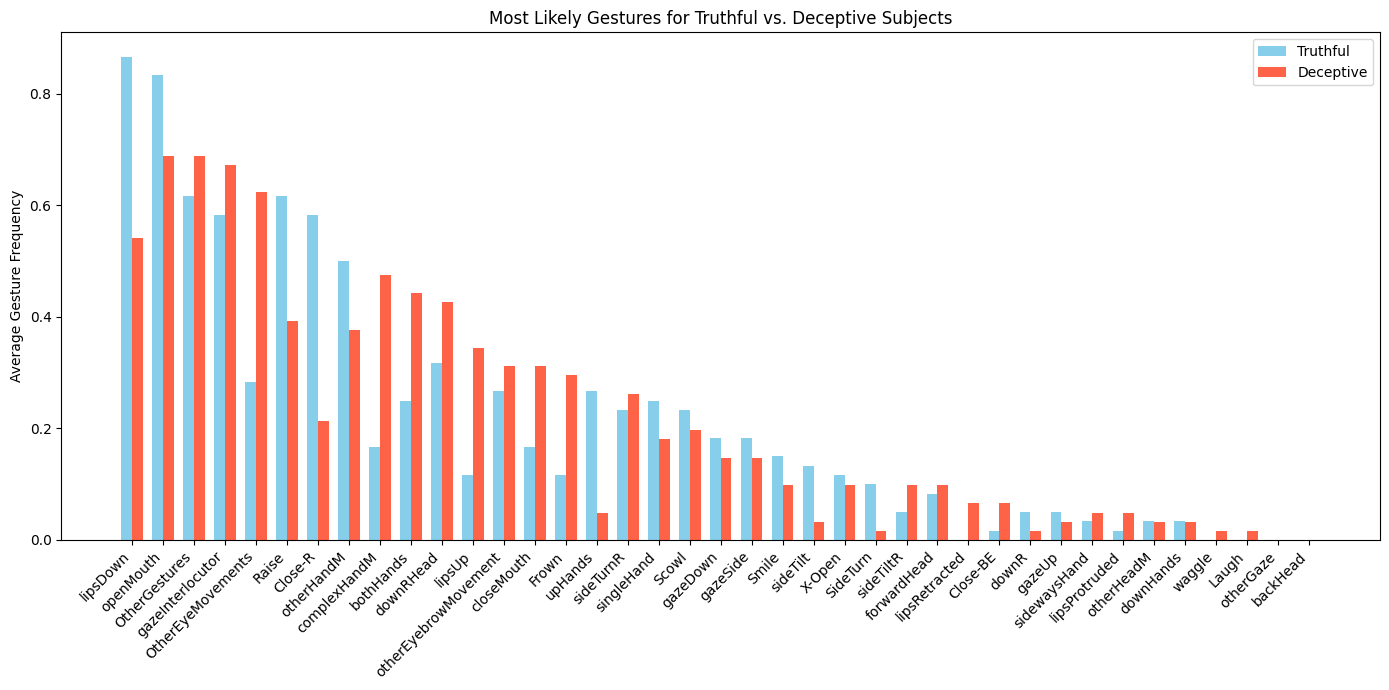

In [17]:
# Get gesture columns only (exclude non-gesture fields)
gesture_cols = [col for col in gestures_df.columns if col not in ["file", "class", "id"]]

# Ensure all gesture values are numeric
gestures_df[gesture_cols] = gestures_df[gesture_cols].apply(pd.to_numeric, errors="coerce")

# Compute average frequency of gestures for each class
truthful_means = gestures_df[gestures_df["class"] == 1][gesture_cols].mean()
deceptive_means = gestures_df[gestures_df["class"] == 0][gesture_cols].mean()

# Combine into a DataFrame for easier plotting
gesture_comparison = pd.DataFrame({
    "Truthful": truthful_means,
    "Deceptive": deceptive_means
}).dropna()

# Sort by max value across both to order most likely gestures
gesture_comparison["Max"] = gesture_comparison.max(axis=1)
gesture_comparison = gesture_comparison.sort_values("Max", ascending=False).drop("Max", axis=1)

# Plot
x = np.arange(len(gesture_comparison))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, gesture_comparison["Truthful"], width, label="Truthful", color="skyblue")
plt.bar(x + width/2, gesture_comparison["Deceptive"], width, label="Deceptive", color="tomato")

plt.xticks(x, gesture_comparison.index, rotation=45, ha="right")
plt.ylabel("Average Gesture Frequency")
plt.title("Most Likely Gestures for Truthful vs. Deceptive Subjects")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Load gesture data (you likely already did this earlier)
gestures_df = pd.read_csv('Real-life_Deception_Detection_2016/Annotation/All_Gestures_Deceptive and Truthful.csv')

# Ensure 'class' is binary numeric
gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1})

# Choose a gesture to test
gesture = 'Smile'

# Create a contingency table
contingency_table = pd.crosstab(gestures_df[gesture], gestures_df['class'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print result
print(f"\nChi-Squared Test for Gesture: {gesture}")
print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Result: Reject the null hypothesis (gesture use depends on class).")
else:
    print("Result: Fail to reject the null hypothesis (gesture use is independent of class).")

Contingency Table:
class   0   1
Smile        
0      55  51
1       6   9

Chi-Squared Test for Gesture: Smile
Chi2 Statistic: 0.3433313142248339
Degrees of Freedom: 1
P-value: 0.5579126069250862
Result: Fail to reject the null hypothesis (gesture use is independent of class).


/var/folders/cx/vj_rjxgj6h3fsn705n9k_ztm0000gn/T/ipykernel_44804/80976537.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gestures_df['class'] = gestures_df['class'].replace({'deceptive': 0, 'truthful': 1})


## Chi-Squared Test

We applied a Chi-Squared test to determine if the gesture `"Smile"` is associated with whether a subject is truthful or deceptive.

- **H₀:** Gesture occurrence is independent of class.
- **H₁:** Gesture occurrence is dependent on class.
- **α = 0.05**

### Conclusion:
The resulting p-value was .56, leading us to fail to reject the null hypothesis. This means that `"Smile"` is not significantly associated with deception class.


Chi-Squared Test for 'Smile':
Chi2 Statistic: 0.3433313142248339
P-value: 0.5579126069250862


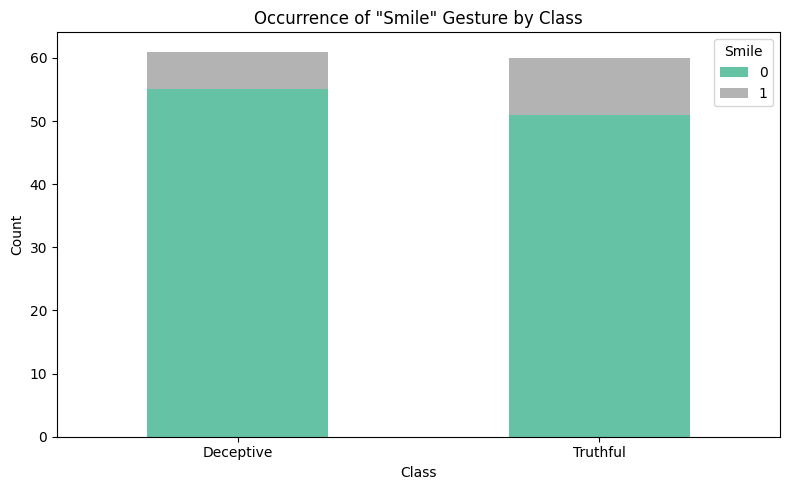

In [20]:
from scipy.stats import chi2_contingency

gesture = "Smile"

# Create contingency table
contingency_table = pd.crosstab(gestures_df[gesture], gestures_df['class'])

# Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Test for '{gesture}':")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Plot
gesture_counts = pd.crosstab(gestures_df['class'], gestures_df[gesture])
gesture_counts.index = ['Deceptive', 'Truthful']

gesture_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title(f'Occurrence of "{gesture}" Gesture by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title=gesture)
plt.tight_layout()
plt.show()

## One-Sample Z-Test Strategy

We use a one-sample t-test (Z-test style) to assess whether the frequency of the `"complexHandM"` gesture in **deceptive** subjects significantly differs from the **overall average** across all subjects.

- **H₀:** The mean `"complexHandM"` usage in deceptive subjects equals the overall mean.
- **H₁:** The mean `"complexHandM"` usage in deceptive subjects is different from the overall mean.
- **Significance Level (α):** 0.05

### Conclusion:
The test yielded a p-value of **0.02**, which is **less than 0.05**, so we **reject the null hypothesis**.

This suggests that the `"complexHandM"` gesture is **significantly different** in frequency among deceptive individuals compared to the overall average — indicating it may be a **useful feature** in deception analysis.

Z-statistic: 2.374623220324945
P-value: 0.020781890679321416


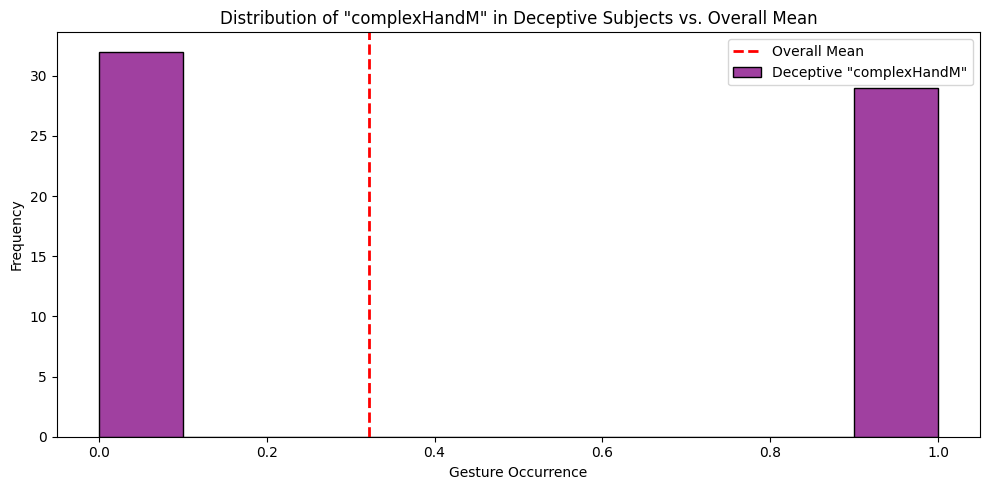

In [30]:
from scipy import stats

gesture = 'complexHandM'

# Clean and prepare data
gesture_data = gestures_df[['class', gesture]].dropna()

# Get values for deceptive group
deceptive_vals = gesture_data[gesture_data['class'] == 0][gesture]

# Overall mean of gesture
overall_mean = gesture_data[gesture].mean()

# Perform one-sample t-test
z_stat, p_val = stats.ttest_1samp(deceptive_vals, overall_mean)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(deceptive_vals, bins=10, kde=False, color='purple', label='Deceptive "complexHandM"')
plt.axvline(overall_mean, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.title(f'Distribution of "{gesture}" in Deceptive Subjects vs. Overall Mean')
plt.xlabel('Gesture Occurrence')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()